In [158]:
import matplotlib.pyplot as plt
import matplotlib.colors as color
import numpy as np
import random

194

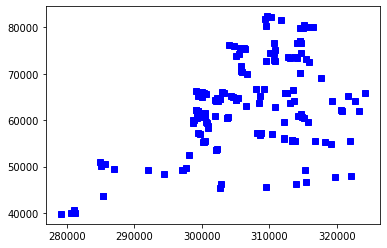

In [159]:
# data=np.load("杭州xyn.npy")
data=np.load("nymergedXY.npy")

# print(data)
demandCoordinates=[(data[i][0],data[i][1]) for i in range(data.shape[0])]
size=data.shape[0]
A=[(i,j) for i in range(size) for j in range(size)]
N=[i for i in range(size)]
pop_density=np.load("pop_density.npy")
for xy in demandCoordinates:
    plt.plot(xy[0],xy[1],c="b",marker="s")
pop_sum=np.sum(pop_density)
pop_average=pop_sum/size
size

In [160]:
# cof=1.2
# ablty=pop_average*10
# p=cof*np.sum(pop_density)/ablty
# q=[pop_density[i] for i in N]
q=[1 for i in N]
p=40
ablty=1.0005*pop_sum/p
ablty

247744.98705882352

In [161]:
geo_dis={(i,j):np.hypot(demandCoordinates[i][0]-demandCoordinates[j][0],demandCoordinates[i][1]-demandCoordinates[j][1]) for i,j in A}   #几何距离
# od=np.load("杭州ODN.npy")
od=np.load("nymergedOD.npy")   #np格式的od矩阵
od_dis={(i,j):od[i][j] for i,j in A}  #字典格式的od矩阵
dis=geo_dis

In [162]:
from gurobipy import Model, GRB , quicksum
mdl=Model("p-center")

In [163]:
x=mdl.addVars(A,vtype=GRB.CONTINUOUS,ub=1,lb=0)
# x=mdl.addVars(A,vtype=GRB.BINARY)
n=mdl.addVars(N,vtype=GRB.INTEGER)
mdl.update()

In [164]:
mdl.ModelSense=GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*dis[i,j]*q[j] for i,j in A))

In [165]:
mdl.addConstrs(quicksum(x[i,j] for j in N)== 1 for i in N);

In [166]:
mdl.addConstr(quicksum(n[i] for i in N )== p);

In [167]:
mdl.addConstrs((quicksum(q[i]*x[i,j] for i in N)<=n[j]*ablty )for j in N);

In [168]:
mdl.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 389 rows, 37830 columns and 75660 nonzeros
Model fingerprint: 0xb2b90bcd
Variable types: 37636 continuous, 194 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [3e-01, 5e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 2845625.4231
Presolve removed 1 rows and 1 columns
Presolve time: 0.05s
Presolved: 388 rows, 37829 columns, 75658 nonzeros
Variable types: 37636 continuous, 193 integer (193 binary)

Root relaxation: objective 0.000000e+00, 193 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0  154 2845625.42    0.00000   100%     -    0s
H    0     0      

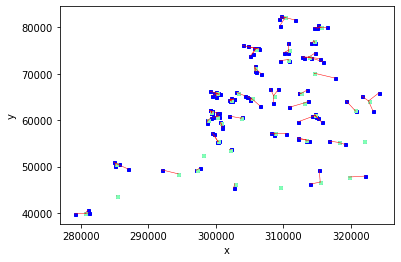

In [169]:
# 画所有点及标注需求
markersize=3
linewidth=0.5
for i in N:
    xy=demandCoordinates[i]
    plt.plot(xy[0],xy[1],c="b",marker="s",markersize=markersize)
    #plt.text(xy[0],xy[1],f"{q[i]}")

# 画需求量
for i in N:
    if (n[i].x>0):
        xy=demandCoordinates[i]
        col=plt.cm.rainbow
        nMax=0.0
        for ni in N:
            # print(type(n[ni].x),n[ni].x,type(nMax))
            if n[ni].x>nMax:
                nMax=n[ni].x
        norm=color.Normalize(vmax=round(nMax)+1,vmin=0)
        plt.plot(xy[0],xy[1],marker="s",color=col(norm(n[i].x)),markersize=markersize)
        # plt.text(xy[0]-5,xy[1]-5,f"{n[i].x}",color="b")
        

# 画供应线
for i,j in A:
    if x[i,j].x>0.0:
        demandCoordinates[i][0],demandCoordinates[i][1]
        demandCoordinates[j][0],demandCoordinates[j][1]
        plt.plot([demandCoordinates[i][0],demandCoordinates[j][0]],[demandCoordinates[i][1],demandCoordinates[j][1]],color="r",linewidth=linewidth)



plt.xlabel("x")
plt.ylabel("y")
plt.show()
    